<a href="https://colab.research.google.com/github/10erick-cpu/Entregas/blob/main/TP6/TP6_Procesamiento_por_Convoluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Práctico VI**

El objetivo de este TP es implementar un aplicativo que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución para los siguientes filtros:

1. Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7.
2. Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones.
3. Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no matemáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original. Otra opción es la conocida como padding en la cual adicionamos filas y columnas de ceros en los extremos de la imagen, similar al que les mostré para hacer que dos imágenes tengan el mismo tamaño.

Deben mostrar el aplicativo que permita cargar o seleccionar la imagen y elegir de una lista el filtro a aplicar ver su resultado. Adicionalmente deben mostrar un plot con todos los filtros aplicados para la imagen de entrada.




### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Steven Martinez Vargas


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Librerias Usadas**

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import imageio as io
from scipy import fftpack
import numpy.fft
import numpy.fft as fp
from PIL import Image
import math


# **Función para leer la imágen y mostrarla**

(540, 540, 3) <class 'numpy.ndarray'>


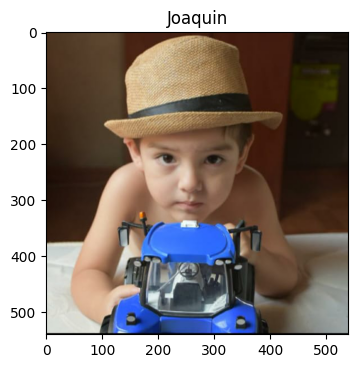

In [ ]:
### Función para leer la Imagen y convertirlo en array ###

def read_ima(path):
    ima = np.asarray(Image.open(path))
    print(ima.shape, type(ima))
    return ima

### Función para leer los canales RGB ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0], ima[:, :, 1], ima[:, :, 2]
    return r, g, b

# r,g,b= channels_ima(im_a)
# print(r,g,b)


## Defino el path ##

path1 = '/content/joaquin.jpeg'

## Leo la Imagen en función del path ##

ima1 = read_ima(path1)

### Graficamos la imagen 1 ###

def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('on')
  plt.show()

plot_image(ima1 ,title='Joaquin')

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ para trabajar con la Luminancia**

In [ ]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

ra,ga,ba = channels_ima(ima1)


### Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

def trans_rgb_to_yiq(r,g,b):
    y= 0.299*r + 0.587*g + 0.114*b
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return clip_rgb(r,g,b)

####  Funciones para Clipear los espacios YIQ & RGB ####

def clip_rgb(r,g,b): 
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

def clip_yiq(y,i,q):
  y=np.clip(y,0,1)
  i=np.clip(i,-0.5957,0.5957)
  q=np.clip(q,-0.5226,0.5226)
  return y,i,q

# **Valores de Ya Ia Qa - Imágen A**

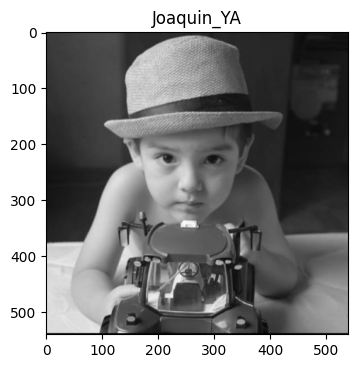

In [ ]:
### Valores de Y I Q , para la imagen A

Ra,Ga,Ba = clip_rgb(ra,ga,ba)

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Ya,Ia,Qa = trans_rgb_to_yiq(Ra,Ga,Ba)

# Ya,Ia,Qa = trans_rgb_to_yiq(ra,ga,ba)

YA,IA,QA = clip_yiq(Ya,Ia,Qa)

# Obtenemos la Luminancia

YA

# Ploteamos la Luminancia 

plot_image(YA ,title='Joaquin_YA',cmap='gray')

# Guardamos la Imagen para su visualizacion al final

io.imwrite('Joaquin_Y.png',(YA*255).astype('uint8'))


# **Filtrado por Convolución - Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7**

##**Pasabajos - Plano 3x3, 5x5, 7x7**

In [ ]:
# Funcion Filtro de Convolucion

def convolution_filter(Y, kernel):
  
    kernel_size = len(kernel)

    row = Y.shape[0] - kernel_size + 1
    col = Y.shape[1] - kernel_size + 1

    result = np.zeros(shape=(row, col))
        
    for i in range(row):
      for j in range(col):
            
            current = Y[i:i+kernel_size, j:j+kernel_size]
            multiplication = np.sum(current * kernel)
            result[i, j] = multiplication

    return result


# Ploteamos la Luminancia para comparar con los filtros

# plot_image(YA ,title='Joaquin_YA',cmap='gray')

## Pasa bajos - Plano 3x3

kernela = (1/9)*np.ones((3,3),dtype= 'float64')


filtered_planoTres = convolution_filter(YA, kernela)

filtered_plano3 = np.clip(filtered_planoTres,0,1)

io.imwrite('filtered_plano3.png', (filtered_plano3*255).astype('uint8'))

# plot_image(filtered_plano3 ,title='Pasa bajo_plano3',cmap='gray')


## Pasa bajos - Plano 5x5

kernelb = (1/25)*np.ones((5,5),dtype= 'float64')

filtered_planoCinco = convolution_filter(YA, kernelb)

filtered_plano5 = np.clip(filtered_planoCinco,0,1)

io.imwrite('filtered_plano5.png', (filtered_plano5*255).astype('uint8'))

# plot_image(filtered_plano5 ,title='Pasa bajo_plano5',cmap='gray')

## Pasa bajos - Plano 7x7

kernelc = (1/49)*np.ones((7,7),dtype= 'float64')

filtered_planoSiete = convolution_filter(YA, kernelc)

filtered_plano7 = np.clip(filtered_planoSiete,0,1)

io.imwrite('filtered_plano7.png', (filtered_plano7*255).astype('uint8'))
# plot_image(filtered_plano7 ,title='Pasa bajo_plano7',cmap='gray')


# **Ploteamos Pasabajos - Plano 3x3, 5x5, 7x7**

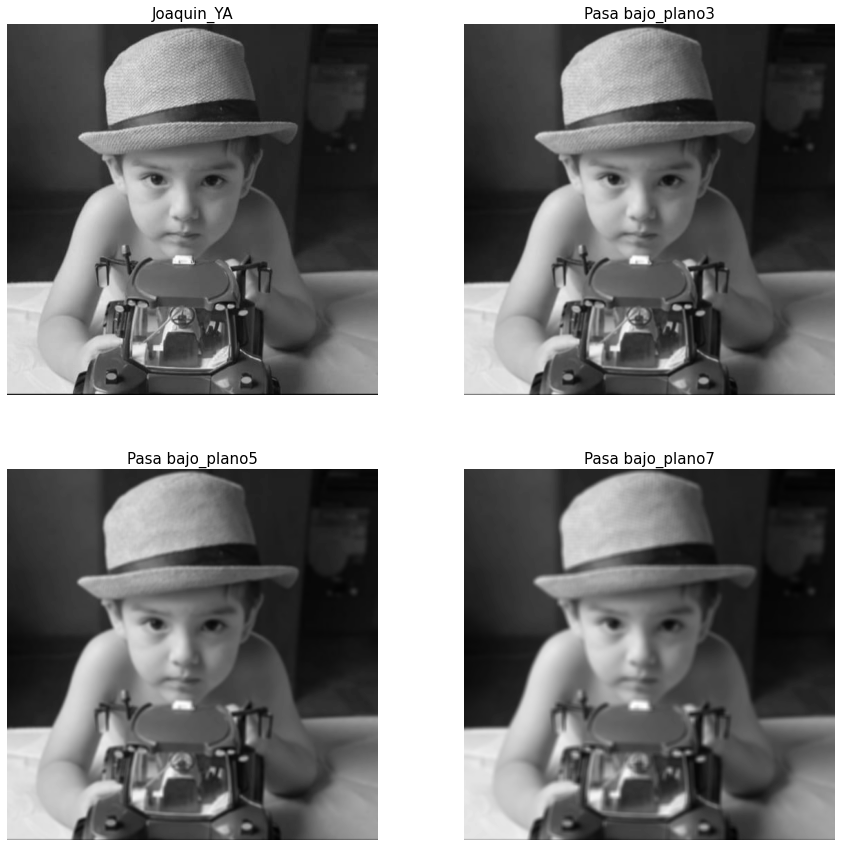

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(YA,cmap='gray')
plt.title('Joaquin_YA',fontsize=15),plt.axis('off') 

plt.subplot(222)
plt.imshow(filtered_plano3,cmap='gray')
plt.title('Pasa bajo_plano3',fontsize=15),plt.axis('off')


plt.subplot(223)
plt.imshow(filtered_plano5,cmap='gray')
plt.title('Pasa bajo_plano5',fontsize=15),plt.axis('off')

plt.subplot(224)
plt.imshow(filtered_plano7,cmap='gray')
plt.title('Pasa bajo_plano7',fontsize=15),plt.axis('off')


plt.show()

#**Pasabajos - Bartlett 3x3, 5x5, 7x7**

In [ ]:
## Pasa bajos - Barlett 3x3

kernel1 = (1/16)* np.array(([1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]))

filtered_bartlettTres = convolution_filter(YA, kernel1)

filtered_bartlett3 = np.clip(filtered_bartlettTres,0,1)

io.imwrite('filtered_bartlett3.png', (filtered_bartlett3*255).astype('uint8'))


# plot_image(filtered_bartlett3 ,title='Pasa bajo_bartlett3',cmap='gray')


# ## Pasa bajos - Barlett 5x5

kernel2 = (1/81)*np.array(([1,2,3,2,1],
                   [2,4,6,4,2],
                   [3,6,9,6,3],
                   [2,4,6,4,2],
                   [1,2,3,2,1]))

filtered_bartlettCinco = convolution_filter(YA, kernel2)

filtered_bartlett5 = np.clip(filtered_bartlettCinco,0,1)

io.imwrite('filtered_bartlett5.png', (filtered_bartlett5*255).astype('uint8'))

# plot_image(filtered_bartlett5 ,title='Pasa bajo_barlett5',cmap='gray')



# ## Pasa bajos - Barlett 7x7

kernel3 = (1/256)*np.array(([1,2,3,4,3,2,1],
                   [2,4,6,8,6,4,2],
                   [3,6,9,12,9,6,3],
                   [4,8,12,16,12,8,4],
                   [3,6,9,12,9,6,3],
                   [1,2,3,4,3,2,1],
                   [2,4,6,8,6,4,2]))


filtered_bartlettSiete = convolution_filter(YA, kernel3)

filtered_bartlett7 = np.clip(filtered_bartlettSiete ,0,1)

io.imwrite('filtered_bartlett7.png', (filtered_bartlett7*255).astype('uint8'))

# plot_image(filtered_bartlett7 ,title='Pasa bajo_bartlett7',cmap='gray')



# **Ploteamos Pasabajos - Barlett 3x3, 5x5, 7x7**

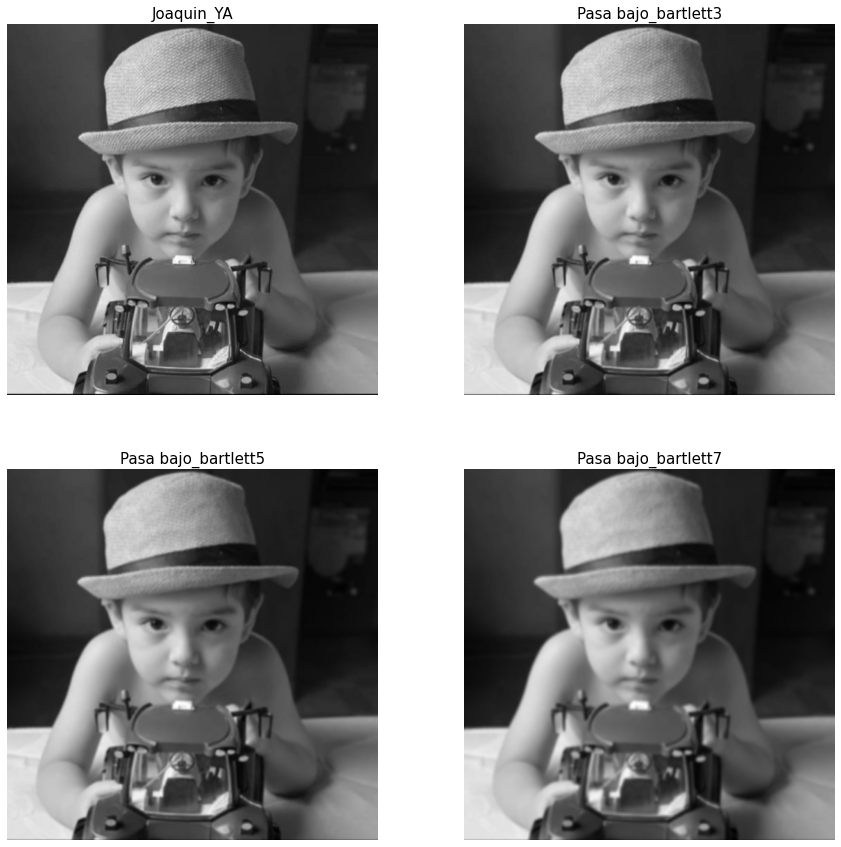

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(YA,cmap='gray')
plt.title('Joaquin_YA',fontsize=15),plt.axis('off') 

plt.subplot(222)
plt.imshow(filtered_bartlett3,cmap='gray')
plt.title('Pasa bajo_bartlett3',fontsize=15),plt.axis('off')


plt.subplot(223)
plt.imshow(filtered_bartlett5,cmap='gray')
plt.title('Pasa bajo_bartlett5',fontsize=15),plt.axis('off')

plt.subplot(224)
plt.imshow(filtered_bartlett7,cmap='gray')
plt.title('Pasa bajo_bartlett7',fontsize=15),plt.axis('off')


plt.show()

# **Pasabajos - Gaussiano 5x5 y 7x7**

In [ ]:
### Pasa bajos - Gaussiano 5x5 ###

kernel4 = (1/256)*np.array(([1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]))

filtered_GaussianoCinco = convolution_filter(YA, kernel4)

filtered_Gaussiano5 = np.clip(filtered_GaussianoCinco,0,1)

io.imwrite('filtered_Gaussiano5.png', (filtered_Gaussiano5*255).astype('uint8'))


# plot_image(filtered_Gaussiano5  ,title='Pasa bajo_Gaussiano5',cmap='gray')


### Pasa bajos - Gaussiano 7x7 ###

kernel5 = (1/4096)*np.array(([1,6,15,20,15,6,1],
                   [6,36,90,120,90,36,6],
                   [15,90,225,300,225,90,15],
                   [20,120,300,400,300,120,20],
                   [15,90,225,300,225,90,15],
                   [6,36,90,120,90,36,6],
                   [1,6,15,20,15,6,1]))

filtered_GaussianoSiete = convolution_filter(YA, kernel5)

filtered_Gaussiano7 = np.clip(filtered_GaussianoSiete,0,1)

io.imwrite('filtered_Gaussiano7.png', (filtered_Gaussiano7*255).astype('uint8'))

# plot_image(filtered_Gaussiano7 ,title='Pasa bajo_Gaussiano7',cmap='gray')


# **Ploteamos Pasabajos - Gaussiano 5x5, 7x7**

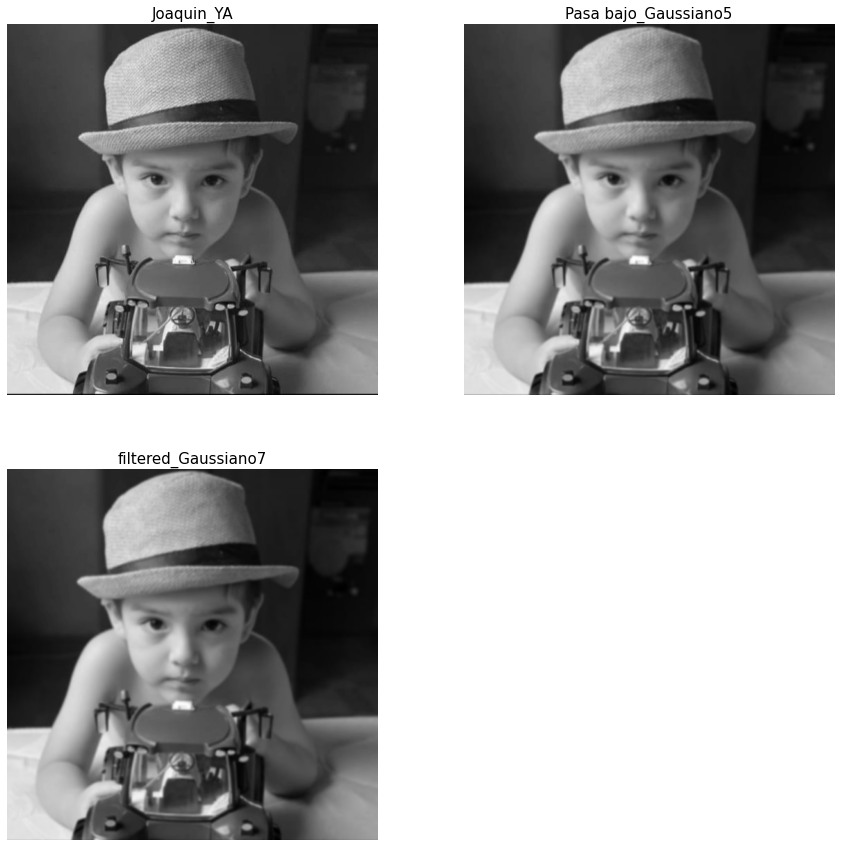

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(YA,cmap='gray')
plt.title('Joaquin_YA',fontsize=15),plt.axis('off') 

plt.subplot(222)
plt.imshow(filtered_Gaussiano5,cmap='gray')
plt.title('Pasa bajo_Gaussiano5',fontsize=15),plt.axis('off')


plt.subplot(223)
plt.imshow(filtered_Gaussiano7,cmap='gray')
plt.title('filtered_Gaussiano7',fontsize=15),plt.axis('off')


plt.show()

# **Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones**

#**Laplaciano v4 y v8**

In [ ]:
# Laplaciano V4

kernel6 = np.array(([0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]))

filtered_LaplacianoV4 = convolution_filter(YA,kernel6)

filtered_LaplacianoV41 =np.clip(filtered_LaplacianoV4,0,1)

io.imwrite('filtered_LaplacianoV4.png', (filtered_LaplacianoV41*255).astype('uint8'))

# plot_image(filtered_LaplacianoV41 ,title='Laplaciano v4',cmap='gray')

# Laplaciano V8

kernel7 = np.array(([-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]))

filtered_LaplacianoV8 = convolution_filter(YA,kernel7)

filtered_LaplacianoV81 =np.clip(filtered_LaplacianoV8,0,1)

io.imwrite('filtered_LaplacianoV8.png', (filtered_LaplacianoV81*255).astype('uint8'))

# plot_image(filtered_LaplacianoV81 ,title='Laplaciano v8',cmap='gray')

# **Ploteamos Laplaciano v4 y v8**

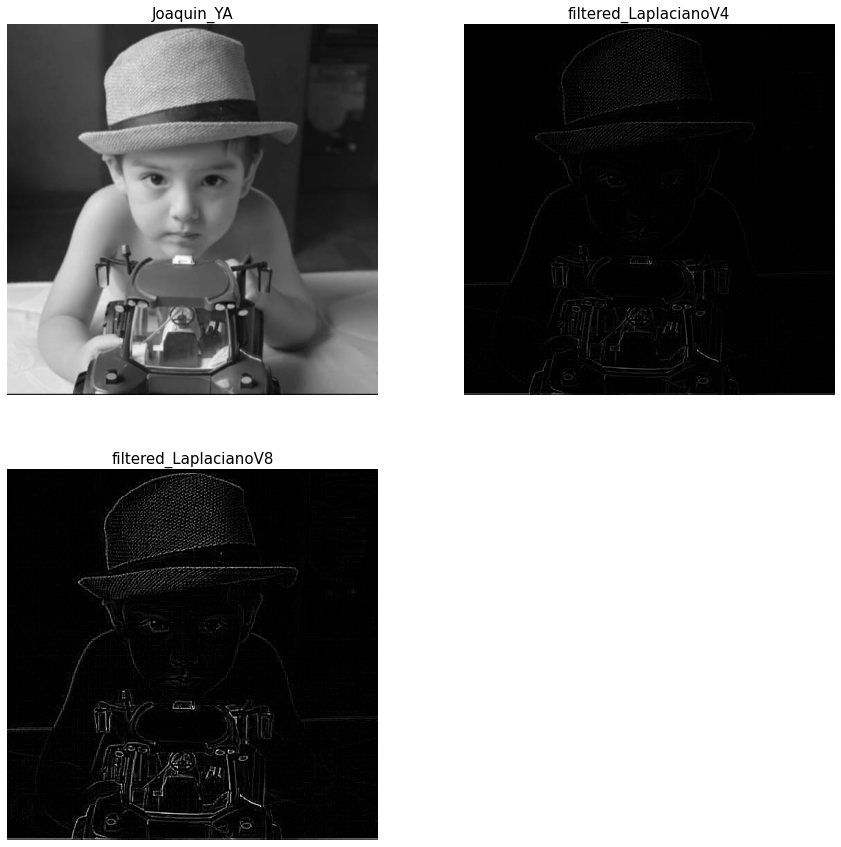

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(YA,cmap='gray')
plt.title('Joaquin_YA',fontsize=15),plt.axis('off') 

plt.subplot(222)
plt.imshow(filtered_LaplacianoV41,cmap='gray')
plt.title('filtered_LaplacianoV4',fontsize=15),plt.axis('off')


plt.subplot(223)
plt.imshow(filtered_LaplacianoV81,cmap='gray')
plt.title('filtered_LaplacianoV8',fontsize=15),plt.axis('off')

plt.show()

# **Sobel las 8 orientaciones**

# **Sobel - N / NE**

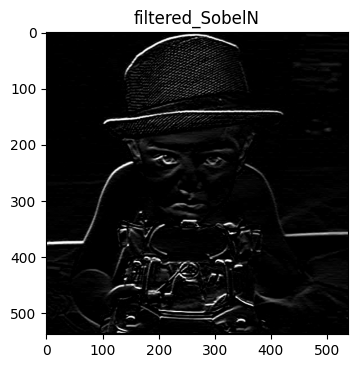

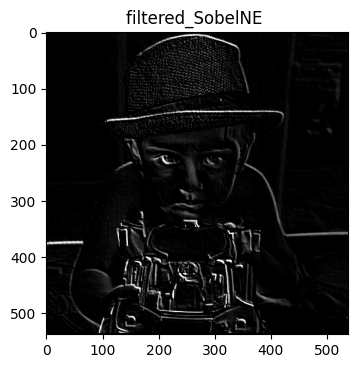

In [ ]:
####  Sobel North -  N ####

kernel8 = np.array(([-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]))

filtered_SobelNor  = convolution_filter(YA,kernel8)

filtered_SobelN =np.clip(filtered_SobelNor,0,1)

io.imwrite('filtered_SobelN.png', (filtered_SobelN*255).astype('uint8'))

plot_image(filtered_SobelN ,title='filtered_SobelN',cmap='gray')


# Sobel North East - NE ##

kernel9 = np.array(([0, -1, -2],
                   [1, 0, -1],
                   [2, 1, 0]))

filtered_SobelNorE  = convolution_filter(YA,kernel9)

filtered_SobelNE =np.clip(filtered_SobelNorE,0,1)

io.imwrite('filtered_SobelNE.png', (filtered_SobelNE*255).astype('uint8'))

plot_image(filtered_SobelNE,title='filtered_SobelNE ',cmap='gray')

# **Sobel - E / SE**

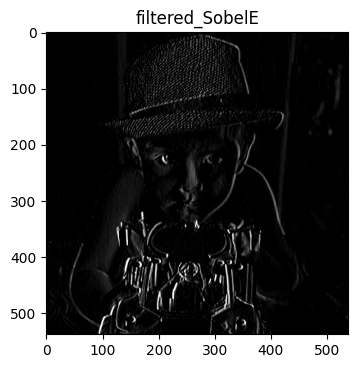

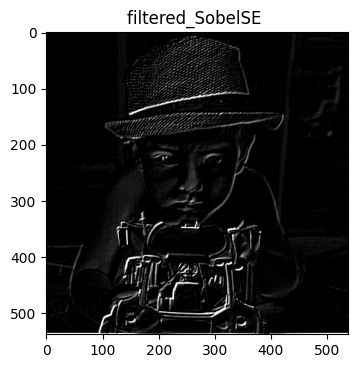

In [ ]:
# Sobel E

kernel10 = np.array(([1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]))

filtered_SobelEast  = convolution_filter(YA,kernel10)


filtered_SobelE =np.clip(filtered_SobelEast,0,1)

io.imwrite('filtered_SobelE.png', (filtered_SobelE*255).astype('uint8'))

plot_image(filtered_SobelE  ,title='filtered_SobelE',cmap='gray')

# Sobel SE

kernel11 = np.array(([2, 1, 0],
                   [1, 0, -1],
                   [0, -1, -2]))

filtered_SobelSouthE  = convolution_filter(YA,kernel11)

filtered_SobelSE =np.clip(filtered_SobelSouthE,0,1)

io.imwrite('filtered_SobelSE.png', (filtered_SobelSE*255).astype('uint8'))

plot_image(filtered_SobelSE,title='filtered_SobelSE ',cmap='gray')

# **Sobel - S / SW**

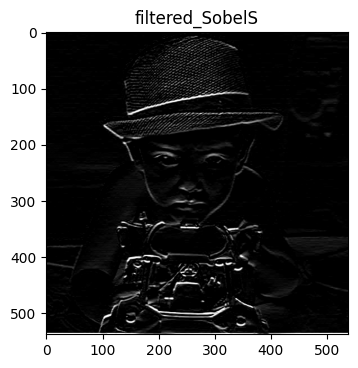

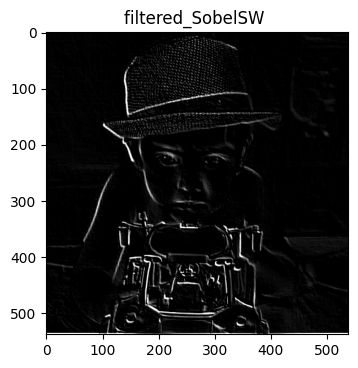

In [ ]:
# Sobel S

kernel12 = np.array(([1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]))

filtered_SobelSouth  = convolution_filter(YA,kernel12)

filtered_SobelS =np.clip(filtered_SobelSouth,0,1)

io.imwrite('filtered_SobelS.png', (filtered_SobelS*255).astype('uint8'))


plot_image(filtered_SobelS  ,title='filtered_SobelS',cmap='gray')

# Sobel SW

kernel13 = np.array(([0, 1, 2],
                   [-1, 0, 1],
                   [-2, -1, 0]))

filtered_SobelSouthW  = convolution_filter(YA,kernel13)

filtered_SobelSW =np.clip(filtered_SobelSouthW,0,1)

io.imwrite('filtered_SobelSW.png', (filtered_SobelSW*255).astype('uint8'))

plot_image(filtered_SobelSW,title='filtered_SobelSW ',cmap='gray')

# **Sobel - W / NW**

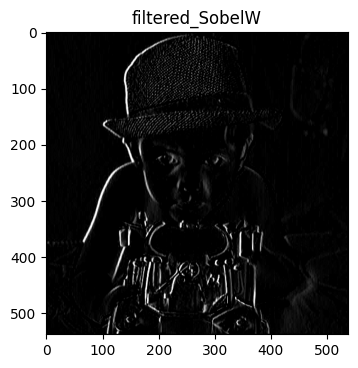

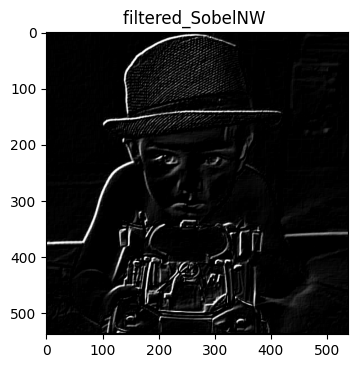

In [ ]:
# Sobel W

kernel14 = np.array(([-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]))

filtered_SobelWest  = convolution_filter(YA,kernel14)


filtered_SobelW =np.clip(filtered_SobelWest,0,1)

io.imwrite('filtered_SobelW.png', (filtered_SobelW*255).astype('uint8'))

plot_image(filtered_SobelW  ,title='filtered_SobelW',cmap='gray')

# Sobel NW

kernel15 = np.array(([-2, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 2]))

filtered_SobelNorthW  = convolution_filter(YA,kernel15)


filtered_SobelNW =np.clip(filtered_SobelNorthW,0,1)

io.imwrite('filtered_SobelNW.png', (filtered_SobelNW*255).astype('uint8'))

plot_image(filtered_SobelNW,title='filtered_SobelNW ',cmap='gray')

# **Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4**

# **Pasa Banda**

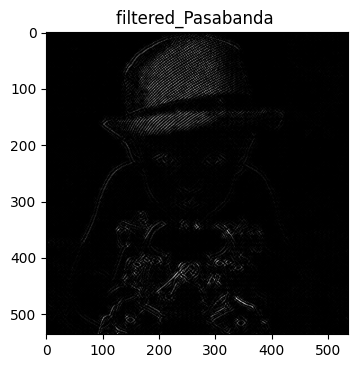

In [46]:
kernel16 = np.array(([1,0,-2,0,1],
                   [0,0,0,0,0],
                   [-2,0,4,0,-2],
                   [0,0,0,0,-0],
                   [1,0,-2,0,1]))


filtered_Pasaban  = convolution_filter(YA,kernel16)


filtered_Pasabanda =np.clip(filtered_Pasaban,0,1)

io.imwrite('filtered_Pasabanda.png', (filtered_Pasabanda*255).astype('uint8'))

plot_image(filtered_Pasabanda,title='filtered_Pasabanda ',cmap='gray')

# **Pasa Altos 02**

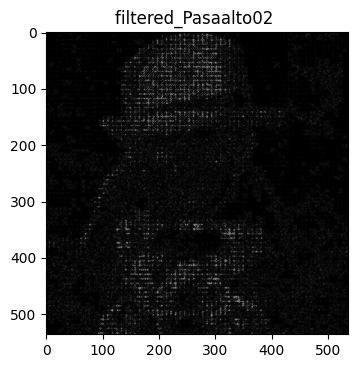

In [47]:
kernel17 = np.array(([1,-4,6,-4,1],
                   [-4,16,-24,16,-4],
                   [6,-24,36,-24,6],
                   [-4,16,-24,16,-4],
                   [1,-4,6,-4,1]))


filtered_Pasa02  = convolution_filter(YA,kernel17)
filtered_Pasaalto02 =np.clip(filtered_Pasa02,0,1)

io.imwrite('filtered_Pasaalto02.png', (filtered_Pasaalto02*255).astype('uint8'))

plot_image(filtered_Pasaalto02,title='filtered_Pasaalto02 ',cmap='gray')

# **Pasa Altos 04**

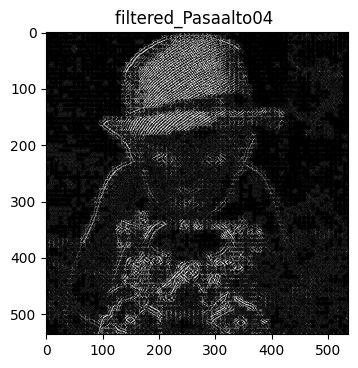

In [52]:
kernel18 = np.array(([1,4,-10,4,1],
                   [4,16,-40,16,4],
                   [-10,-40,100,-40,-10],
                   [4,16,-40,16,4],
                   [1,4,-10,4,1]))


filtered_Pasa04  = convolution_filter(YA,kernel18)
filtered_Pasaalto04 =np.clip(filtered_Pasa04,0,1)

io.imwrite('filtered_Pasaalto04.png', (filtered_Pasaalto04*255).astype('uint8'))

plot_image(filtered_Pasaalto04,title='filtered_Pasaalto04 ',cmap='gray')

# **Función para leer las imagenes**




In [58]:
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im

## Path de imagenes ##

## Luminacia de la Imagen

Y_imagen = '/content/Joaquin_Y.png' # Luminancia

## Pasabajos: Plano 3x3, 5x5, 7x7

filtered_plano3 = '/content/filtered_plano3.png'   # Filtro plano 3x3
filtered_plano5 = '/content/filtered_plano5.png'   # Filtro plano 5x5
filtered_plano7 = '/content/filtered_plano7.png'   # Filtro plano 7x7

### Pasabajos - Bartlett 3x3, 5x5, 7x7

filtered_bartlett3 = '/content/filtered_bartlett3.png' 
filtered_bartlett5 = '/content/filtered_bartlett5.png'
filtered_bartlett7 = '/content/filtered_bartlett7.png'

### Gaussiano 5x5 y 7x7

filtered_Gaussiano5 = '/content/filtered_Gaussiano5.png'
filtered_Gaussiano7 = '/content/filtered_Gaussiano7.png'

## Laplaciano V4 y V8

filtered_LaplacianoV4 = '/content/filtered_LaplacianoV4.png'
filtered_LaplacianoV8 = '/content/filtered_LaplacianoV8.png'

## Sobel las 8 orientaciones ##

filtered_SobelN = '/content/filtered_SobelN.png'
filtered_SobelNE = '/content/filtered_SobelNE.png'

filtered_SobelE = '/content/filtered_SobelE.png'
filtered_SobelSE = '/content/filtered_SobelSE.png'

filtered_SobelS = '/content/filtered_SobelS.png'
filtered_SobelSW = '/content/filtered_SobelSW.png'


filtered_SobelW = '/content/filtered_SobelW.png'
filtered_SobelNW = '/content/filtered_SobelNW.png'


## Pasa Banda

filtered_Pasabanda = '/content/filtered_Pasabanda.png'

## Pasa Altos frecuencias 0.2 y 0.4

filtered_Pasaalto02 = '/content/filtered_Pasaalto02.png'

filtered_Pasaalto04 = '/content/filtered_Pasaalto04.png'




# **Aplicativo - Filtros**

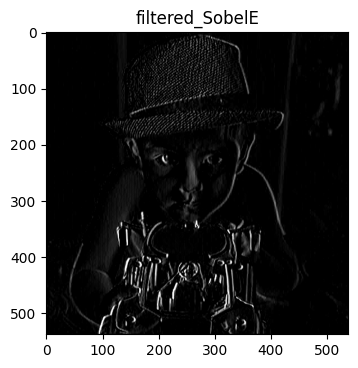

In [64]:
#@title Espacio RGB - Selecccione una Imágen. { run: "auto" }

Imagen = 'filtered_SobelE' #@param ["Y_imagen ","filtered_plano3","filtered_plano5","filtered_plano7","filtered_bartlett3","filtered_bartlett5","filtered_bartlett7","filtered_Gaussiano5","filtered_Gaussiano7","filtered_LaplacianoV4","filtered_LaplacianoV8","filtered_SobelN","filtered_SobelNE","filtered_SobelE","filtered_SobelSE","filtered_SobelS","filtered_SobelSW","filtered_SobelW","filtered_SobelNW","filtered_Pasabanda","filtered_Pasaalto02","filtered_Pasaalto04"]

if Imagen == 'Y_imagen ':
  im = get_image(Y_imagen)
  plot_image(im,'Y_imagen','gray')

elif Imagen == 'filtered_plano3':
  im = get_image(filtered_plano3)
  plot_image(im,'filtered_plano3','gray')

elif Imagen == 'filtered_plano5':
  im = get_image(filtered_plano5)
  plot_image(im,'filtered_plano5','gray')

elif Imagen == 'filtered_plano7':
  im = get_image(filtered_plano7)
  plot_image(im,'filtered_plano7','gray')

elif Imagen == 'filtered_bartlett3':
  im = get_image(filtered_bartlett3)
  plot_image(im,'filtered_bartlett3','gray')

elif Imagen == 'filtered_bartlett5':
  im = get_image(filtered_bartlett5)
  plot_image(im,'filtered_bartlett5','gray')

elif Imagen == 'filtered_bartlett7':
  im = get_image(filtered_bartlett7)
  plot_image(im,'filtered_bartlett7','gray')

elif Imagen == 'filtered_Gaussiano5':
  im = get_image(filtered_Gaussiano5)
  plot_image(im,'filtered_Gaussiano5','gray')

elif Imagen == 'filtered_Gaussiano7':
  im = get_image(filtered_Gaussiano7)
  plot_image(im,'filtered_Gaussiano7','gray')

elif Imagen == 'filtered_LaplacianoV4':
  im = get_image(filtered_LaplacianoV4)
  plot_image(im,'filtered_LaplacianoV4','gray')

elif Imagen == 'filtered_LaplacianoV8':
  im = get_image(filtered_LaplacianoV8)
  plot_image(im,'filtered_LaplacianoV8','gray')

elif Imagen == 'filtered_SobelN':
  im = get_image(filtered_SobelN)
  plot_image(im,'filtered_SobelN','gray')

elif Imagen == 'filtered_SobelNE':
  im = get_image(filtered_SobelNE)
  plot_image(im,'filtered_SobelNE','gray')


elif Imagen == 'filtered_SobelE':
  im = get_image(filtered_SobelE)
  plot_image(im,'filtered_SobelE','gray')

elif Imagen == 'filtered_SobelSE':
  im = get_image(filtered_SobelSE)
  plot_image(im,'filtered_SobelSE','gray')

elif Imagen == 'filtered_SobelS':
  im = get_image(filtered_SobelS)
  plot_image(im,'filtered_SobelS','gray')


elif Imagen == 'filtered_SobelSW':
  im = get_image(filtered_SobelSW)
  plot_image(im,'filtered_SobelSW','gray')

elif Imagen == 'filtered_SobelW':
  im = get_image(filtered_SobelW)
  plot_image(im,'filtered_SobelW','gray')

elif Imagen == 'filtered_SobelNW':
  im = get_image(filtered_SobelNW)
  plot_image(im,'filtered_SobelNW','gray')


elif Imagen == 'filtered_Pasabanda':
  im = get_image(filtered_Pasabanda)
  plot_image(im,'filtered_Pasabanda','gray')


elif Imagen == 'filtered_Pasaalto02':
  im = get_image(filtered_Pasaalto02)
  plot_image(im,'filtered_Pasaalto02','gray')

elif Imagen == 'filtered_Pasaalto04':
  im = get_image(filtered_Pasaalto04)
  plot_image(im,'filtered_Pasaalto04','gray')
